In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Implementation of Deep Neural Network

In [23]:
# Load the text and normalization-one hot representation

X = np.loadtxt("./FeaturesX.csv")
Y = np.loadtxt("./LabelsY.csv")
X = X.reshape((800,7))
Y = Y.astype(int)
Y = pd.DataFrame(Y, columns=['labels'])

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 

min_max_scaler = preprocessing.MinMaxScaler()
Features = min_max_scaler.fit_transform(X)

Y_onehot = pd.get_dummies(Y, columns=['labels'])
Target = Y_onehot.values

# adding bias
unityMatrix = np.ones((np.shape(Features)[0],1))    # bias
final_x = np.concatenate((unityMatrix, Features), axis=1) # adding bias to feature vector

# train-test split
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(final_x, Target, test_size=0.3, random_state=20)

In [24]:
# model specifications
size_train = 560
Ni=8; Nh=64; No=3;

# parameter and array initialization
learningRate = 0.01
Ntrials = 2000
wh=np.random.randn(Nh,Ni); dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

# Training
for trials in range(Ntrials):     

  h=1/(1+np.exp(-wh@x_train.T ))        # hidden activation for all pattern
  y=1/(1+np.exp(-wo@h))                 # output for all pattern

  do=y*(1-y)*(y_train.T-y)/size_train   # delta output
  dh=h*(1-h)*(wo.transpose()@do)        # delta backpropagated  


  # update weights with momentum
  dwo=0.9*dwo+do@h.T
  wo=wo+learningRate*dwo
  dwh=0.9*dwh+dh@x_train
  wh=wh+learningRate*dwh

  error=np.append(error,np.mean((y_train.T-y)**2))
  
  if trials % 100 == 0:
    print('Iteration ',trials, 'Mean Squared Error: ',np.mean((y_train.T-y)**2))


# Testing
h=1/(1+np.exp(-wh@X_test.T)) 
predicted=1/(1+np.exp(-wo@h))        
predicted = np.round(predicted)

# Accuracy
accuracyScore = (y_test == predicted.T)
print('\nAccuracy Score from the Test Dataset: ', accuracyScore.mean())

Iteration  0 Mean Squared Error:  0.5964651999022419
Iteration  100 Mean Squared Error:  0.409405141244384
Iteration  200 Mean Squared Error:  0.3813169260748589
Iteration  300 Mean Squared Error:  0.22959214802828587
Iteration  400 Mean Squared Error:  0.22659255874844741
Iteration  500 Mean Squared Error:  0.223969206616718
Iteration  600 Mean Squared Error:  0.22165318430513137
Iteration  700 Mean Squared Error:  0.21959893900992766
Iteration  800 Mean Squared Error:  0.21776531982360167
Iteration  900 Mean Squared Error:  0.21611795892148924
Iteration  1000 Mean Squared Error:  0.21462991184592875
Iteration  1100 Mean Squared Error:  0.21328118312086566
Iteration  1200 Mean Squared Error:  0.21205759137000235
Iteration  1300 Mean Squared Error:  0.21094930720425922
Iteration  1400 Mean Squared Error:  0.2099493277359253
Iteration  1500 Mean Squared Error:  0.2090521036433669
Iteration  1600 Mean Squared Error:  0.20825247444248318
Iteration  1700 Mean Squared Error:  0.207544984116

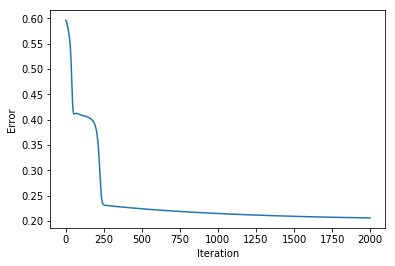

In [25]:
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(error)
plt.show()

In [3]:
# load csv file
df = pd.read_csv('./houses1.csv')
df.head()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
0,221.9,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,62,0,1340,5650
1,538.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,66,40,1690,7639
2,180.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,84,0,2720,8062
3,604.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,52,0,1360,5000
4,510.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,30,0,1800,7503


In [4]:
df.describe()  # various static summary of data

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


In [5]:
# normalization of dataset
df = (df - df.mean())/df.std()  

# split the data into features and target
X=df.iloc[:,1:].values
Y=df.iloc[:,0].values
X_1=df.iloc[:,3].values

# reshape the target matrix
Y = Y.reshape((21613,1))

## 4.2 Linear Regression


In [7]:
# spli the data into train and test set
X1_train = df.iloc[1:-1:2,3].values
X1_test = df.iloc[0:-1:2,3].values
Y_train = df.iloc[1:-1:2,0].values
Y_test = df.iloc[0:-1:2,0].values
X_train = df.iloc[1:-1:2,1:].values
X_test = df.iloc[0:-1:2,1:].values

# reshape the target matrix
Y_train = Y_train.reshape((10806,1))
Y_test = Y_test.reshape((10806,1))

### Linear Regression for feature vector X_1


In [23]:
# linear regression function for feature X_1
def linear_regression(X, Y, lr, repetition):
    m = 0 # params
    c = 0 
    loss_X1 = np.array([]) 
    n = float(len(X))  # number of instances in train set
    for i in range(repetition): 
        Y_pred = X * m + c  
        loss_X1 = np.append(loss_X1,sum((Y_pred-Y)**2))  # loss per interation 
        #derM = (-2/n) * sum(X * (Y - Y_pred))  # derivation od cost function
        #derC = (-2/n) * sum(Y - Y_pred)  
        m = m - (lr * ((-2/n) * sum(X * (Y - Y_pred))))  # update the parameter m
        c = c - (lr * ((-2/n) * sum(Y - Y_pred)))  # update the parameter c
        
    return m,c,loss_X1 

In [24]:
# function for prediction
def prediction(X, Y, m, c):
    n = float(len(X_1))
    Y_pred = X * m + c
    mse = (1/n) * sum((Y_pred-Y)**2)
    return mse    

In [ ]:
m,c,loss_X1 = linear_regression(X1_train,Y_train,0.0001,10000)

In [ ]:
mse = prediction(X1_test, Y_test, m, c)
print("MSE for X_1 feature",mse)

In [ ]:
# learning Curve for feature matrix X_1
plt.loglog(loss)
plt.xlabel('Iterations'); plt.ylabel('Loss')
plt.show()

In [ ]:
### Linear Regression for feature matrix X

In [ ]:
# Multivariant Linear Regression for feature matrix X
def multilinear_regression(X, Y, lr, repetition):
    m = np.ones((1,len(X[0])))
    c = 0
    n = float(len(X)) 
    loss=np.array([])
    for i in range(repetition): 
        Y_pred = X @ m.T + c  
        loss=np.append(loss,sum((Y_pred-Y)**2))
        D_m = -2/n * np.sum((Y - Y_pred)*X ,axis=0)  
        D_c =-2/n * sum(Y - Y_pred)  
        m = m - lr * D_m  
        c = c - lr * D_c  
    return m,c,loss

In [ ]:
# prediction function
def prediction(X, Y, m, c):
    n = float(len(X_1))
    Y_pred = X @ m.T + c
    mse = (1/n) * sum((Y_pred-Y)**2)
    return mse    

In [ ]:
params, c, loss_X = multilinear_regression(X_train, Y_train, 0.0001, 10000)

In [ ]:
mse = prediction(X_test, Y_test, params, c)
print("MSE for X features",mse)

In [ ]:
# learning Curve for feature matrix X
plt.loglog(loss_X)
plt.xlabel('Iterations'); plt.ylabel('Loss')
plt.show()

In [ ]:
### 4.3 Plot the model

#### Linear model for feature X_1(Price vs Area)

In [ ]:
# Making predictions
plt.scatter(X_1, Y,s=5,color='red') 
plt.plot(X_1,Y_pred)
plt.show()

In [ ]:
#### Linear Model for feature X(actual values vs predicated values)


In [ ]:
plt.scatter(Y_pred, Y,s=5,color='red')
plt.xlabel('Predicted Values'); plt.ylabel('Actual Values')
plt.show()

In [ ]:
## 4.4 Ridge Regression

#### Ridge Linear Regression for X_1 feature vector 

In [ ]:
# linear regression function for feature X_1
def linear_regression_Ridge(X, Y, lr, repetition, alpha):
    m = 0 # params
    c = 0 
    loss_X1 = np.array([]) 
    n = float(len(X))  # number of instances in train set
    for i in range(repetition): 
        Y_pred = m*X + c  # linear regression function
        loss_X1 = np.append(loss_X1,sum((Y_pred-Y)**2))  # loss per interation 
        derM = (-2/n) * sum(X * (Y - Y_pred))  # derivation od cost function
        derC = (-2/n) * sum(Y - Y_pred)  
        m = m*(1 - ((lr*alpha)/n)) - lr * derM
        c = c - (lr * derC)  # update the parameter c
        
    return m,c,loss_X1 

# function for prediction
def prediction(X, Y, m, c):
    n = float(len(X_1))
    Y_pred = X * m + c
    mse = (1/n) * sum((Y_pred-Y)**2)
    return mse    

params_ridge,c_ridge,loss_X1 = linear_regression_Ridge(X1_train,Y_train,0.0001,10000,0.1)

mse = prediction(X_test, Y_test, params, c)
print("MSE for X features",mse)

# learning Curve for feature matrix X
plt.loglog(loss_X)
plt.xlabel('Iterations'); plt.ylabel('Loss')
plt.show()

#### Ridge Regression for X matrix

# Building the model
def multilinear_regression_Ridge(X, Y, lr, re, alpha):
    m = np.ones((1,len(X[0])))
    #m_identity = np.identity((len(X[0])))
    c = 0
    n = float(len(X)) # Number of elements in X
    mse=np.array([])
    # Performing Gradient Descent 
    for i in range(re): 
        Y_pred = X @ m.T + c  # The current predicted value of Y
        mse = np.append(mse,sum((Y_pred-Y)**2))
        D_m = -2/n * np.sum((Y - Y_pred)*X ,axis=0)  # Derivative wrt m
        c = c - lr*(-2/n * sum(Y - Y_pred))  # Update c
        m = m*(1 - ((lr*alpha)/n)) - lr * D_m
    return m,c,mse

# prediction function
def prediction(X, Y, m, c):
    n = float(len(X_1))
    Y_pred = X @ m.T + c
    mse = (1/n) * sum((Y_pred-Y)**2)
    return mse    

m,c,mse = multilinear_regression_Ridge(X_train,Y_train,0.0001, 10000, 0.1)

##### MSE for Feature X_1 is 0.25508278


MSE_ridge = prediction(X_test, Y_test, m, c)
print("MSE for X features",MSE_ridge)

# learning graph
plt.loglog(mse)
plt.xlabel('Iterations'); plt.ylabel('Loss')
plt.show()

plt.scatter(Y_pred, Y,s=5,color='red')
plt.xlabel('Predicted Values'); plt.ylabel('Actual Values')
plt.show()

mse_reg=np.array([])
list_penalty = [0.1, 0.01, 1, 10, 100, 5, 50, 500]
for i in list_penalty:
    m,c,mse = linear_regression_Ridge(X,Y,0.0001, 10000,i)
    Y_pred = X @ m.T + c
    mse_reg = np.append(mse,sum((Y_pred-Y)**2))

# learning graph
plt.loglog(mse_reg)
plt.xlabel('Iterations'); plt.ylabel('Loss')
plt.show()



In [ ]:
## 4.5 Ridge Regression with Momentum

# Building the model
def linear_regression_Ridge_momentum(X, Y, lr, re, alpha, beta):
    m = np.ones((1,len(X[0])))
    m_identity = np.identity((len(X[0])))
    c = 0
    n = float(len(X)) # Number of elements in X
    mse=np.array([])
    V_dc = 0
    V_dm = np.zeros((1,len(X[0])))
    # Performing Gradient Descent 
    for i in range(re): 
        Y_pred = X @ m.T + c  # The current predicted value of Y
        mse = np.append(mse,sum((Y_pred-Y)**2))
        D_m = -2/n * np.sum((Y - Y_pred)*X ,axis=0)  # Derivative wrt m
        D_c = -2/n * sum(Y - Y_pred)
        V_dm = (beta * V_dm) + (1- beta)*D_m
        V_dc = (beta * V_dc) + (1- beta)*D_c
        c = c - lr* V_dc  # Update c
        m = m*(1 - ((lr*alpha)/n)) - lr * V_dm
    return m,c,mse

m,c,mse = linear_regression_Ridge_momentum(X,Y,0.0001, 10000, 0.1, 0.9)

Y_pred = X @ m.T + c

# learning graph
plt.loglog(mse)
plt.xlabel('Iterations'); plt.ylabel('Loss')
plt.show()



In [ ]:
## 4.6 Optimized Polynomial Regression

# Building the model
def polynomial_regression_optimized (X, Y, lr, re, alpha, beta):
    m = np.zeros((1,len(X[0])))
    c = 0
    n = float(len(X)) # Number of elements in X
    mse=np.array([])
    V_dc = 0
    V_dm = np.zeros((1,len(X[0])))
    # Performing Gradient Descent 
    for i in range(re): 
        Y_pred = X @ m.T + c  # The current predicted value of Y
        mse = np.append(mse,sum((Y_pred-Y)**2))
        D_m = -2/n * np.sum((Y - Y_pred)*X ,axis=0)  # Derivative wrt m
        D_c = -2/n * sum(Y - Y_pred)
        V_dm = (beta * V_dm) + (1- beta)*D_m
        V_dc = (beta * V_dc) + (1- beta)*D_c
        c = c - lr* V_dc  # Update c
        m = m*(1 - ((lr*alpha)/n)) - lr * V_dm
    return m,c,mse

m

X_1a = X_1.reshape((21613,1))
X_1a.shape

X_sq = np.array(X_1a**2)
X_sq = X_sq.reshape((21613,1))
X_mod = np.concatenate((X_1a,X_sq ), axis=1)
X_mod.shape

m,c,mse = polynomial_regression_optimized(X_mod,Y,0.0001, 10000, 0.1,0.9)

Y_pred = Y_pred.ravel()
Y_pred.shape

plt.plot(X_1, Y_pred)

In [ ]:
Reference:
https://www.geeksforgeeks.org/find-average-list-python/
https://machinelearningmastery.com/k-fold-cross-validation/
irisdata program given on the brightspace
mlp program given on the brightspace
https://www.youtube.com/watch?v=k8fTYJPd3_I
https://www.geeksforgeeks.org/python-pandas-dataframe/#targetText=Pandas%20DataFrame%20is%20two%2Ddimensional,fashion%20in%20rows%20and%20columns.